<div style="background-color: lightgreen; color: black; padding: 10px;">
    <h3>NYSE Forecast Factory: Stock Price Prediction 
</h3> </div>

#### Build and evaluate a time series forecasting model for predicting stock prices using the historical stock price dataset from Yahoo Finance. Use statistical methods and deep learning techniques to forecast future stock prices and analyze the accuracy of their predictions.

- Project Outline
    - Model code
    - Forecasting result!
    - Jupyter notebook with documentation

Steps to Apply:

*   Data Collection: Gather historical stock price data (e.g., daily closing prices).
*   Data Preprocessing: Ensure the data is cleaned and prepared for modeling (e.g., handling missing values).
*   Stationarity Check: Use tests like the Augmented Dickey-Fuller (ADF) test to check if the data is stationary. If not, use differencing to make it stationary.
*   Model Selection: Use ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) plots to determine the parameters (p, d, q) of the ARIMA model.
*   Fit the ARIMA Model: Use the chosen parameters to fit the ARIMA model to your time series data.
*   Forecasting: Once the model is fitted, use it to forecast future values.
*   Model Evaluation: Evaluate the forecast's accuracy using metrics like RMSE (Root Mean Squared Error) or MAE (Mean Absolute Error).


1. Collect the Data: We can use libraries like yfinance to fetch real-time stock data. Here's how you can get stock price data for a company (e.g., Apple - AAPL):

[*********************100%***********************]  1 of 1 completed


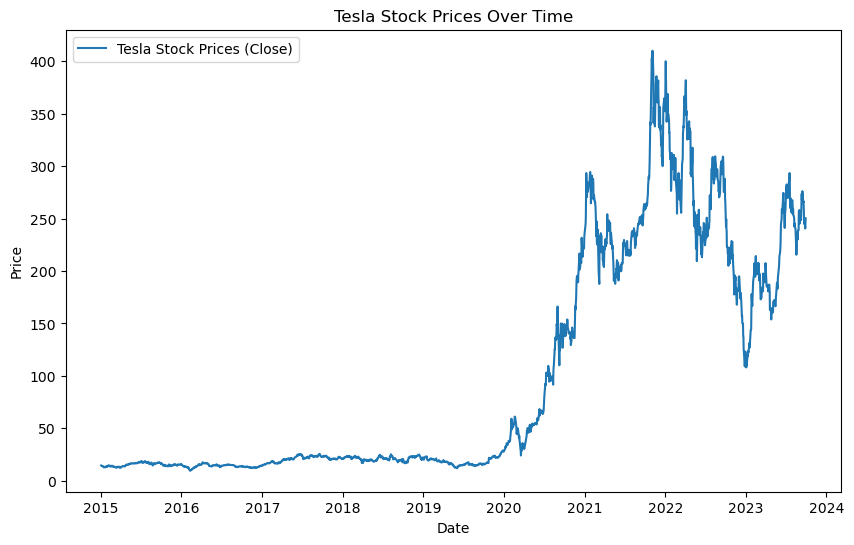

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500
...,...,...,...,...,...,...
2023-09-25,243.380005,247.100006,238.309998,246.990005,246.990005,104636600
2023-09-26,242.979996,249.550003,241.660004,244.119995,244.119995,101993600
2023-09-27,244.259995,245.330002,234.580002,240.500000,240.500000,136597200


In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download historical stock price data 
ticker = 'TSLA'
data = yf.download(ticker, start='2015-01-01', end='2023-10-01')
#data = yf.download(ticker, start='2023-10-01', end='2023-10-11')

# We'll focus on the 'Close' price for this example
stock_prices = data['Close']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, label='Tesla Stock Prices (Close)')
plt.title('Tesla Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

data


In [21]:
# type(data)
#data['Close'].tolist()

# Limiting the display of 'Close' values to two decimal points and formatting as strings
close_values_formatted = [f"{value:.2f}" for value in data['Close'].tolist()]

# Displaying the rounded and formatted values
close_values_formatted


['14.62',
 '14.01',
 '14.09',
 '14.06',
 '14.04',
 '13.78',
 '13.48',
 '13.62',
 '12.85',
 '12.79',
 '12.87',
 '12.80',
 '13.10',
 '13.44',
 '13.42',
 '13.77',
 '13.73',
 '13.29',
 '13.68',
 '13.57',
 '14.06',
 '14.56',
 '14.57',
 '14.73',
 '14.49',
 '14.50',
 '14.42',
 '14.19',
 '13.53',
 '13.58',
 '13.62',
 '13.63',
 '14.11',
 '14.47',
 '13.82',
 '13.61',
 '13.58',
 '13.81',
 '13.56',
 '13.16',
 '13.30',
 '13.50',
 '13.38',
 '12.93',
 '12.73',
 '12.69',
 '12.92',
 '12.74',
 '12.58',
 '13.05',
 '12.98',
 '13.38',
 '13.04',
 '13.21',
 '13.31',
 '13.45',
 '12.95',
 '12.69',
 '12.33',
 '12.70',
 '12.58',
 '12.51',
 '12.73',
 '13.54',
 '13.55',
 '13.84',
 '14.01',
 '14.06',
 '13.99',
 '13.83',
 '13.86',
 '13.78',
 '13.79',
 '13.68',
 '13.96',
 '14.63',
 '14.57',
 '14.56',
 '15.44',
 '15.37',
 '15.50',
 '15.07',
 '15.07',
 '15.37',
 '15.53',
 '15.36',
 '15.79',
 '15.77',
 '15.97',
 '16.32',
 '16.21',
 '16.27',
 '16.59',
 '16.58',
 '16.48',
 '16.29',
 '16.37',
 '16.52',
 '16.50',
 '16.50',


2. Check for Stationarity: The ARIMA model assumes that the time series is stationary (i.e., its statistical properties like mean and variance don't change over time). We can use the ADF test to check for stationarity and apply differencing if necessary.

In [8]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test to check stationarity
result = adfuller(stock_prices)

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')



ADF Statistic: -1.1096515740192459
p-value: 0.7112076614091272
The series is not stationary, applying differencing...


##### Step 4: Differencing (if necessary)
         - If the p-value is greater than 0.05, we'll apply differencing to make the data stationary.

The series is not stationary, applying differencing...


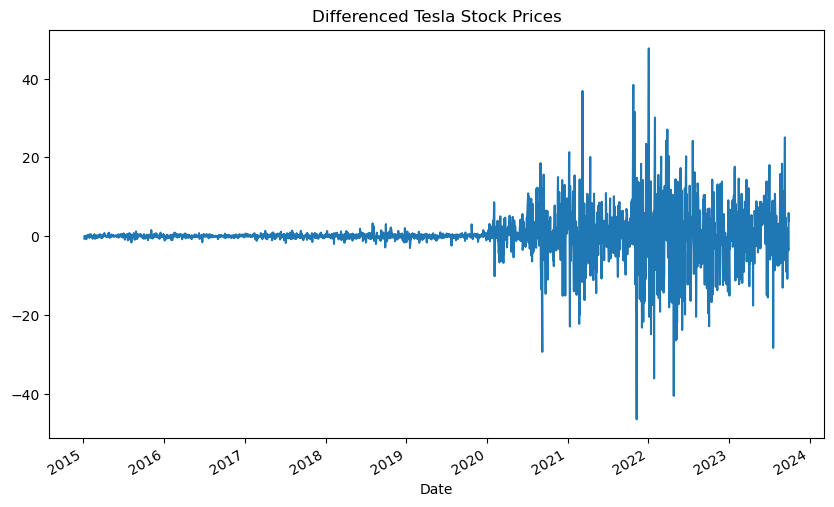

In [30]:
# Check if the series is stationary and apply differencing if necessary
if result[1] > 0.05:
    print("The series is not stationary, applying differencing...")
    data['Close_diff'] = data['Close'].diff().dropna()  # Apply first-order differencing directly to 'data'
else:
    print("The series is stationary.")

# Plotting the differenced data
data['Close_diff'].plot(figsize=(10, 6), title='Differenced Tesla Stock Prices')
plt.show()


3. ACF and PACF Plots: After differencing, we check the ACF and PACF plots to help select the p and q parameters for ARIMA. These plots help determine the number of autoregressive (p) and moving average (q) terms.

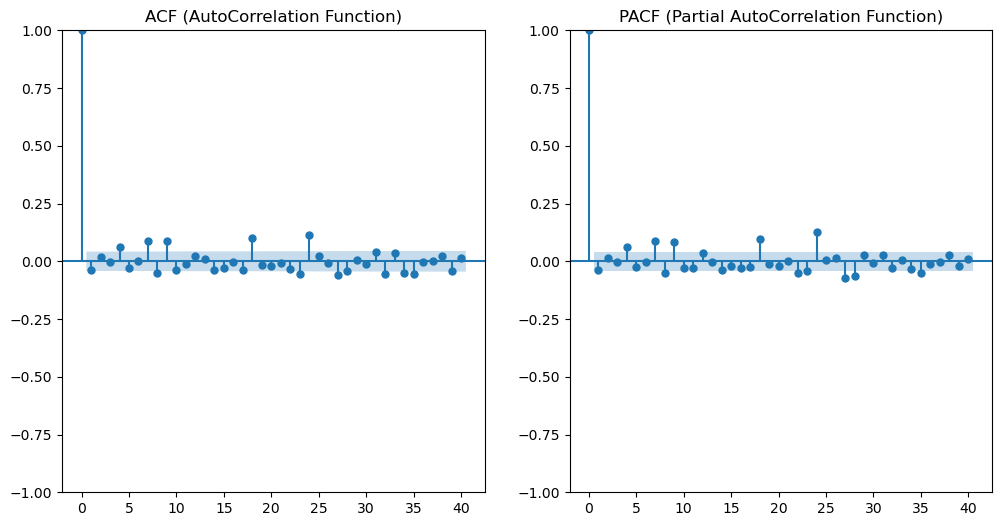

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# A lag refers to the time difference between a particular observation and a prior observation in the dataset.
# Interms of ACF - Lag is the number of time steps backward from the current point for which we are calculating the correlation.
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(stock_prices_diff, lags=40, ax=plt.gca())
plt.title('ACF (AutoCorrelation Function)')
plt.subplot(122)
plot_pacf(stock_prices_diff, lags=40, ax=plt.gca())
plt.title('PACF (Partial AutoCorrelation Function)')
plt.show()


4. Fit the ARIMA Model: Based on the ACF and PACF plots, we select values for p and q. We assume (p=1, d=1, q=1) as a starting point. We fit the ARIMA model to the differenced data.

In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (e.g., ARIMA(1, 1, 1))
model = ARIMA(stock_prices, order=(1, 1, 1))
model_fit = model.fit()

# Print summary of the model
print(model_fit.summary())

C:\Users\macma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\macma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\macma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2201
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6941.736
Date:                Wed, 16 Oct 2024   AIC                          13889.471
Time:                        14:38:38   BIC                          13906.560
Sample:                             0   HQIC                         13895.716
                               - 2201                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5792      0.177     -3.281      0.001      -0.925      -0.233
ma.L1          0.5420      0.183      2.964      0.003       0.184       0.900
sigma2        32.2263      0.362     89.021      0.0

C:\Users\macma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


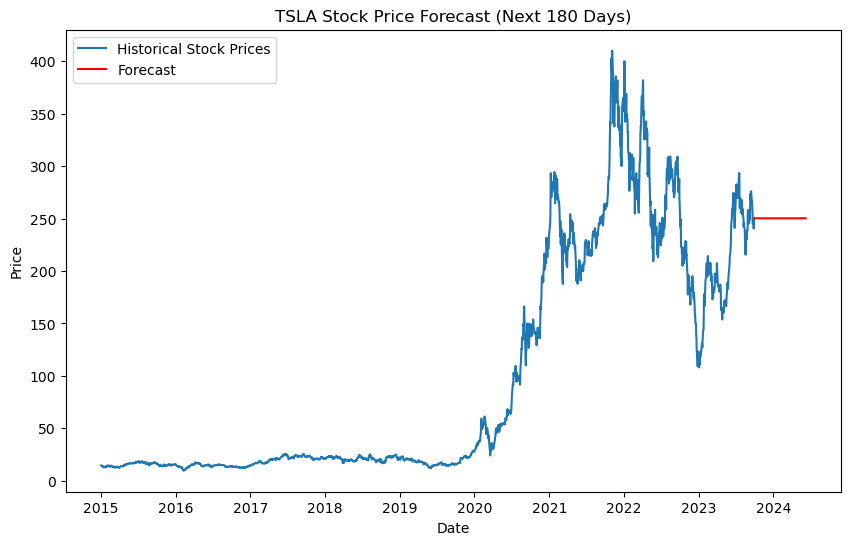

In [35]:
# Forecast the next 180 days
forecast = model_fit.forecast(steps=180)

# Create the date range for the next 180 business days
forecast_dates = pd.date_range(start=stock_prices.index[-1], periods=181, freq='B')[1:]  # Adjust for 180 days

# Plot the forecast along with historical stock prices
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, label='Historical Stock Prices')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.title(f'{ticker} Stock Price Forecast (Next 180 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


C:\Users\macma\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


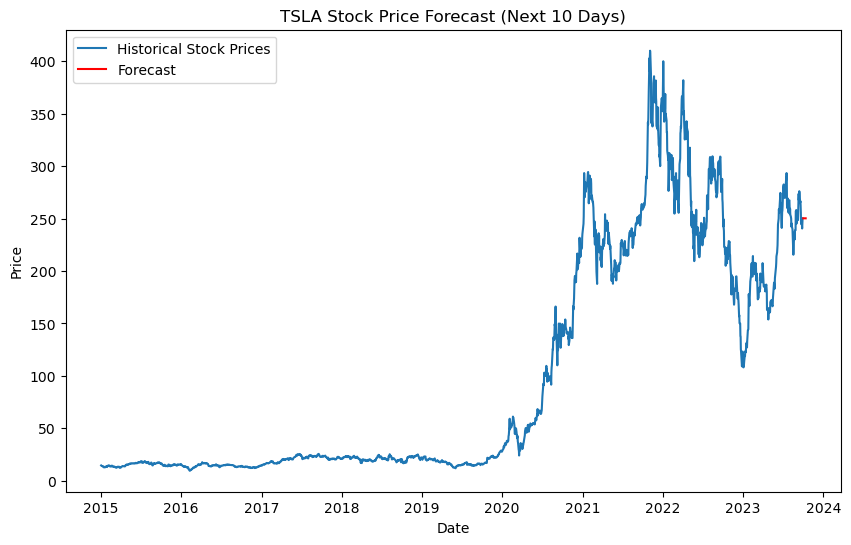

In [38]:
# Forecast the next 10 days
forecast = model_fit.forecast(steps=10)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, label='Historical Stock Prices')
plt.plot(pd.date_range(start=stock_prices.index[-1], periods=11, freq='B')[1:], forecast, label='Forecast', color='red')
plt.title(f'{ticker} Stock Price Forecast (Next 10 Days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assume you have a test set with actual stock prices for 10 days
test_set = [173.75, 172.399, 173.660, 174.9100, 177.490, 178.990, 178.389, 177.490, 178.490, 177.490]

# Use the first 10 values of the forecast for comparison
forecast_10_days = forecast[:10]

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_set, forecast_10_days))
print(f'RMSE: {rmse:.2f}')



RMSE: 73.93
